In [1]:
import numpy as np
import glob
import pickle
from sklearn import tree
from tqdm import tqdm
import os
import manipulacion_midi
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
%matplotlib inline

In [2]:
tiempos_previos=5                         #Numero de tiempos previos utilizados para el entrenamiento y la prediccion
longitud_minima=15                        #Tamaño minimo (en tiempos) que deben tener las canciones del conjunto de entrenamiento
carpeta_canciones='../canciones_entrenamiento' #Carpeta donde estan las canciones el entrenamiento
modelo_guardado='mejor_modelo_arbol.h5'        #Nombre del archivo donde se guardara el modelo entrenado
profundidad_arbol=100                     #Profundidad maxima del arbol 

#Elimina los tiempos vacios antes de todas las canciones
def eliminar_zeros_iniciales(arr):
    i=0
    ceros=np.zeros_like(arr[0])
    tamano=np.size(arr,0)
    while np.array_equal(arr[i],ceros) and tamano!=1:
        arr=np.delete(arr,i, axis=0)
        tamano=tamano-1
    return arr

def leer_canciones(ruta):
    print('Cargando archivos...')
    archivos = glob.glob('{}/*.mid*'.format(ruta))
    archivos = np.array(np.sort(archivos))
    archivos = archivos.tolist()
    global canciones
    global numero_cancion
    canciones = []
    numero_cancion=0
    for f in tqdm(archivos):
        print(f)
        try:
            cancion = np.array(manipulacion_midi.midiToNoteStateMatrix(f))			#Convierte los archivos .mid a matrices 
            cancion=eliminar_zeros_iniciales(cancion)
            tam = np.array(cancion).shape[0]
            print(tam)
            if tam > longitud_minima:
                if(numero_cancion==0):
                    canciones=cancion
                    numero_cancion=numero_cancion+1
                else:
                    canciones= np.concatenate([canciones, cancion], axis=0)
                    numero_cancion=numero_cancion+1
        except Exception as e:
            raise e
    return canciones


In [3]:
#Cargar canciones
canciones = leer_canciones(carpeta_canciones)

print("Se cargaron {} canciones".format(numero_cancion))

Cargando archivos...


  0%|                                                                                           | 0/30 [00:00<?, ?it/s]

../canciones\K19d Piano Sonata Duet.mid
1761


  3%|██▊                                                                                | 1/30 [00:00<00:17,  1.69it/s]

../canciones\K279 Piano sonata n01 1mov.mid
2204


  7%|█████▌                                                                             | 2/30 [00:01<00:18,  1.55it/s]

../canciones\K279 Piano sonata n01 3mov.mid
1708


 10%|████████▎                                                                          | 3/30 [00:01<00:16,  1.66it/s]

../canciones\K281 Piano Sonata n03 1mov.mid
2516


 13%|███████████                                                                        | 4/30 [00:02<00:16,  1.62it/s]

../canciones\K281 Piano Sonata n03 3mov.mid
2387


 17%|█████████████▊                                                                     | 5/30 [00:04<00:22,  1.10it/s]

../canciones\K309 Piano Sonata n10 1mov.mid
4957


 20%|████████████████▌                                                                  | 6/30 [00:06<00:34,  1.43s/it]

../canciones\K309 Piano Sonata n10 3mov.mid
2014


 23%|███████████████████▎                                                               | 7/30 [00:07<00:30,  1.33s/it]

../canciones\K330 Piano Sonata n10 1mov.mid
2399


 27%|██████████████████████▏                                                            | 8/30 [00:09<00:28,  1.30s/it]

../canciones\K330 Piano Sonata n10 3mov.mid
2731


 30%|████████████████████████▉                                                          | 9/30 [00:10<00:27,  1.32s/it]

../canciones\K331 Piano sonata n11 3mov.mid
1785


 33%|███████████████████████████▎                                                      | 10/30 [00:10<00:21,  1.09s/it]

../canciones\K333 Piano Sonata n13 1mov.mid
5281


 37%|██████████████████████████████                                                    | 11/30 [00:13<00:29,  1.54s/it]

../canciones\K333 Piano Sonata n13 3mov.mid
3153


 40%|████████████████████████████████▊                                                 | 12/30 [00:15<00:27,  1.53s/it]

../canciones\K358 Piano Sonata 4 Hands.mid
1777


 43%|███████████████████████████████████▌                                              | 13/30 [00:15<00:20,  1.23s/it]

../canciones\K381 Piano Sonata 4 Hands.mid
1553


 47%|██████████████████████████████████████▎                                           | 14/30 [00:16<00:16,  1.02s/it]

../canciones\K521 Piano Sonata 4 Hands.mid
3649


 50%|█████████████████████████████████████████                                         | 15/30 [00:17<00:16,  1.07s/it]

../canciones\K545 Piano Sonata.mid
2369


 53%|███████████████████████████████████████████▋                                      | 16/30 [00:18<00:13,  1.04it/s]

../canciones\K570 Piano Sonata 2mov.mid
1265


 57%|██████████████████████████████████████████████▍                                   | 17/30 [00:18<00:10,  1.26it/s]

../canciones\K570 Piano Sonata 3mov.mid
1939


 60%|█████████████████████████████████████████████████▏                                | 18/30 [00:18<00:08,  1.42it/s]

../canciones\Piano Sonata n01 K279.mid
1617


 63%|███████████████████████████████████████████████████▉                              | 19/30 [00:19<00:08,  1.29it/s]

../canciones\Piano Sonata n03 K281.mid
1745


 67%|██████████████████████████████████████████████████████▋                           | 20/30 [00:20<00:08,  1.21it/s]

../canciones\Piano Sonata n04 K282.mid
1153


 70%|█████████████████████████████████████████████████████████▍                        | 21/30 [00:21<00:06,  1.31it/s]

../canciones\Piano Sonata n06 K284.mid
2033


 73%|████████████████████████████████████████████████████████████▏                     | 22/30 [00:22<00:07,  1.11it/s]

../canciones\Piano Sonata n07 K309.mid
2481


 77%|██████████████████████████████████████████████████████████████▊                   | 23/30 [00:24<00:07,  1.03s/it]

../canciones\Piano Sonata n08 K311.mid
3281


 80%|█████████████████████████████████████████████████████████████████▌                | 24/30 [00:25<00:07,  1.22s/it]

../canciones\Piano Sonata n09 K310.mid
2129


 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [00:26<00:06,  1.20s/it]

../canciones\Piano Sonata n10 K330.mid
2401


 87%|███████████████████████████████████████████████████████████████████████           | 26/30 [00:28<00:04,  1.23s/it]

../canciones\Piano Sonata n13 K333.mid
2645


 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [00:29<00:03,  1.26s/it]

../canciones\Piano Sonata n14 K457.mid
4897


 93%|████████████████████████████████████████████████████████████████████████████▌     | 28/30 [00:31<00:03,  1.62s/it]

../canciones\Piano Sonata n15 K593-494.mid
3829


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 29/30 [00:33<00:01,  1.70s/it]

../canciones\Piano Sonata n16 K545.mid
1185


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:34<00:00,  1.38s/it]


Se cargaron 30 canciones


In [4]:
X=[]
y=[]
for i in range(0, len(canciones) - tiempos_previos):
    X.append(np.ravel(canciones[i: i + tiempos_previos]))
    y.append(canciones[i + tiempos_previos])

In [ ]:
#Genera el modelo y lo guarda en un archivo 'modelo_guardado'
clf = tree.DecisionTreeClassifier(max_depth=profundidad_arbol)
clf = clf.fit(X, y)

pickle.dump(clf, open(modelo_guardado, 'wb'))

In [7]:
#Carga el modelo entrenado
if os.path.isfile('./{}'.format(modelo_guardado)):
    clf = pickle.load(open(modelo_guardado, 'rb'))
else:
    print('No existe el modelo')

In [41]:
#Evaluacion de modelo

log_loss(np.asarray(y), np.asarray(clf.predict(X)))


6.6069824966387189

In [8]:
np.shape(y)

(74839, 156)

In [15]:
np.asarray(y, dtype=np.float32)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [16]:
np.asarray(clf.predict(X), dtype=np.float32)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

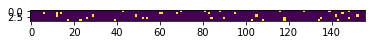

In [22]:
w = np.random.choice([0, 1], size=(tiempos_previos,156),  p=[0.95,0.05])
plt.imshow(w)

In [23]:
#Generar nueva cancion

tamano_cancion=200         #Numero de tiempos que tendra la cancion generada

u = np.zeros((1, tiempos_previos, 156), dtype=np.int32)
tamano_cancion=tamano_cancion+tiempos_previos
cancion_base=w
ent=np.zeros((tamano_cancion,156))
ent[0:tiempos_previos,:]=cancion_base
for i in tqdm(range (0,tamano_cancion-tiempos_previos)):			#Creacion de la cancion
    nueva_fila = clf.predict(np.reshape(ent[i:i+tiempos_previos,:].ravel(),(1,tiempos_previos*156)))
    if (np.all(np.round_(nueva_fila)==0)):
        nueva_fila[0,np.argsort(-nueva_fila)[0,:4]]=1
    ent[i+tiempos_previos] = nueva_fila
    ent=np.round_(ent)

ent=ent[tiempos_previos:tamano_cancion+tiempos_previos,:]

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 169.80it/s]


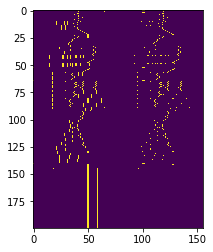

In [24]:
plt.imshow(ent)

In [25]:
manipulacion_midi.noteStateMatrixToMidi(ent, "./cancion_generada6")